In [ ]:
# Import core libraries used throughout the notebook:
# pandas for data, numpy for numeric ops, matplotlib/seaborn/plotly for plotting, cufflinks for combined plotly/pandas usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.offline as pyo
import plotly.express as px

In [ ]:
# Initialize Plotly for offline use inside the notebook (enables interactive plots inline)
pyo.init_notebook_mode(connected=True)

In [ ]:
# Enable Cufflinks offline mode so DataFrame plots use Plotly without requiring an online connection
cf.go_offline()

In [ ]:
# Load worldometer CSV data into a pandas DataFrame — update path to a local file if needed
data=pd.read_csv("/Users/kajal.parmar/Documents/worldometer_data.csv")

In [ ]:
# Show the DataFrame object — beware this can be large; prefer .head() for a quick preview
data

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [ ]:
# Preview first few rows of the DataFrame to inspect columns and values
data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
# Print DataFrame schema: column names, non-null counts, and dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [ ]:
# List the column names in the DataFrame
data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [ ]:
# Show descriptive statistics for numeric columns
data.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [ ]:
# Count duplicate rows in the DataFrame
data.duplicated().sum()

np.int64(0)

In [ ]:
# Count missing values per column so we can plan cleaning steps
data.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [ ]:
# Fill NA values where the dataset may omit numbers (replace with 0 to avoid calculation issues)
data['Population']=data['Population'].fillna(0)
data['TotalCases'] = data['TotalCases'].fillna(0)
data['NewCases'] = data['NewCases'].fillna(0)
data['TotalDeaths'] = data['TotalDeaths'].fillna(0)
data['NewDeaths'] = data['NewDeaths'].fillna(0)

In [ ]:
# Print shape to see rows and columns count
data.shape

(209, 16)

In [ ]:
# Remove commas from numeric columns and coerce to numeric type (useful when numbers are stored as strings like '1,234')
for col in ['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths']:
    data[col] = data[col].astype(str).str.replace(',', '')
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

In [ ]:
# Get top 10 countries by TotalCases and print a compact table
top10_cases = data.sort_values(by='TotalCases', ascending=False).head(10)
print(top10_cases[['Country/Region', 'TotalCases', 'TotalDeaths']])

  Country/Region  TotalCases  TotalDeaths
0            USA     5032179     162804.0
1         Brazil     2917562      98644.0
2          India     2025409      41638.0
3         Russia      871894      14606.0
4   South Africa      538184       9604.0
5         Mexico      462690      50517.0
6           Peru      455409      20424.0
7          Chile      366671       9889.0
8       Colombia      357710      11939.0
9          Spain      354530      28500.0


In [ ]:
# Compute a DeathRate column as a percentage and show it
 data['DeathRate'] = (data['TotalDeaths'] / data['TotalCases'] * 100).round(2)
 data['DeathRate']

0       3.24
1       3.38
2       2.06
3       1.68
4       1.78
       ...  
204     7.69
205     0.00
206     0.00
207     0.00
208    10.00
Name: DeathRate, Length: 209, dtype: float64

In [ ]:
# List countries with TotalDeaths equal to zero (filtered view)
data[data['TotalDeaths']==0]['Country/Region']

168                  Mongolia
169                   Eritrea
172            Faeroe Islands
174                  Cambodia
177                 Gibraltar
184                Seychelles
186                    Bhutan
190          French Polynesia
191    St. Vincent Grenadines
193                     Macao
196               Saint Lucia
197               Timor-Leste
198                   Grenada
199             New Caledonia
200                      Laos
201                  Dominica
202     Saint Kitts and Nevis
203                 Greenland
205     Caribbean Netherlands
206          Falkland Islands
207              Vatican City
Name: Country/Region, dtype: object

In [ ]:
# Find which country has the maximum TotalDeaths (grouped and sorted)
data[['Country/Region','TotalDeaths']].groupby(['Country/Region']).max().sort_values(by='TotalDeaths',ascending=False).head(1)

,TotalDeaths
Country/Region,
USA,162804.0


In [ ]:
# Identify the country with the maximum TotalRecovered value
max_recovered = data['TotalRecovered'].max() 
country_max_recovered = data[data['TotalRecovered'] == max_recovered]['Country/Region'].values
country_max_recovered

array(['USA'], dtype=object)

In [ ]:
# Aggregate TotalDeaths by WHO Region to compare regional totals
data.groupby(['WHO Region'])['TotalDeaths'].sum()

WHO Region
Africa                   15538.0
Americas                384637.0
EasternMediterranean     42376.0
Europe                  215564.0
South-EastAsia           50624.0
WesternPacific            3975.0
Name: TotalDeaths, dtype: float64

In [ ]:
# Aggregate TotalRecovered by WHO Region to compare regional recoveries
data.groupby(['WHO Region'])['TotalRecovered'].sum()

WHO Region
Africa                   604326.0
Americas                6259733.0
EasternMediterranean    1340094.0
Europe                  2047446.0
South-EastAsia          1621081.0
WesternPacific           182319.0
Name: TotalRecovered, dtype: float64

/var/folders/6v/1qsrq9vn7bxf27njzdwstpf40000gn/T/ipykernel_53015/462386027.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




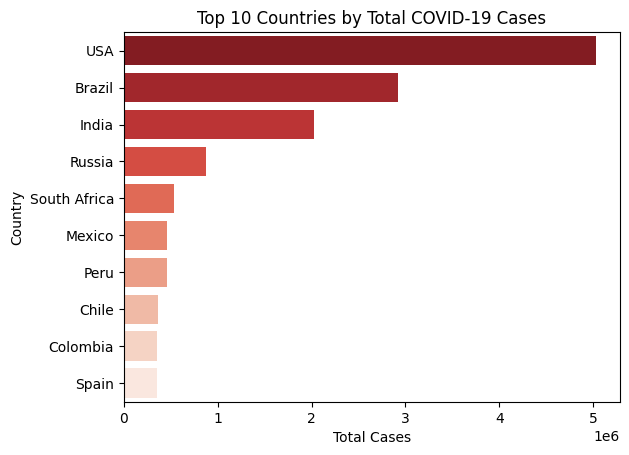

In [ ]:
# Plot bar chart: top 10 countries by TotalCases
top10_cases = data.sort_values('TotalCases', ascending=False).head(10)
sns.barplot(x='TotalCases', y='Country/Region', data=top10_cases, palette='Reds_r')
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()

/var/folders/6v/1qsrq9vn7bxf27njzdwstpf40000gn/T/ipykernel_53015/3974844085.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




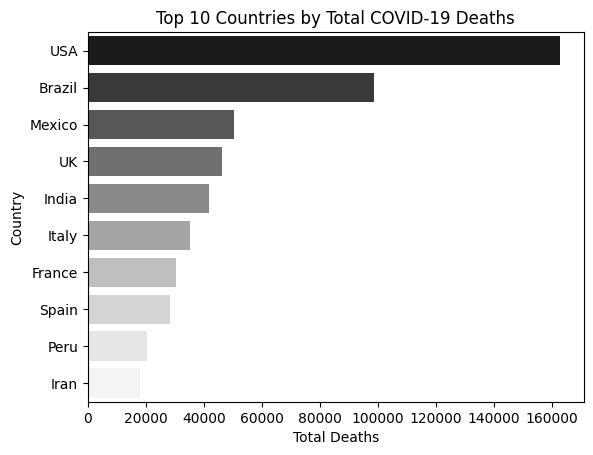

In [ ]:
# Plot bar chart: top 10 countries by TotalDeaths
top10_deaths = data.sort_values('TotalDeaths', ascending=False).head(10)
sns.barplot(x='TotalDeaths', y='Country/Region', data=top10_deaths, palette='Greys_r')
plt.title("Top 10 Countries by Total COVID-19 Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.show()


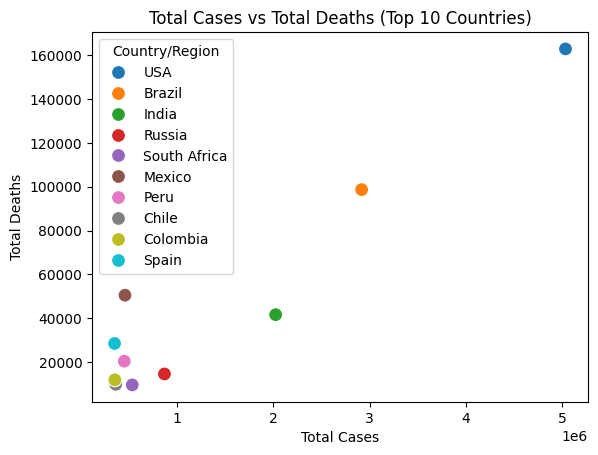

In [ ]:
# Scatterplot: TotalCases vs TotalDeaths for top 10 countries — color by country
sns.scatterplot(x='TotalCases', y='TotalDeaths', data=top10_cases, hue='Country/Region', s=100)
plt.title("Total Cases vs Total Deaths (Top 10 Countries)")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()

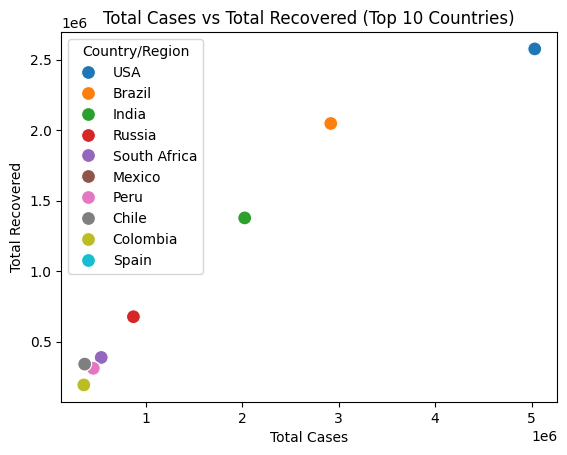

In [ ]:
# Scatterplot: TotalCases vs TotalRecovered for top 10 — color by country and size for readability
sns.scatterplot(x='TotalCases', y='TotalRecovered', data=top10_cases, hue='Country/Region', s=100)
plt.title("Total Cases vs Total Recovered (Top 10 Countries)")
plt.xlabel("Total Cases")
plt.ylabel("Total Recovered")
plt.show()

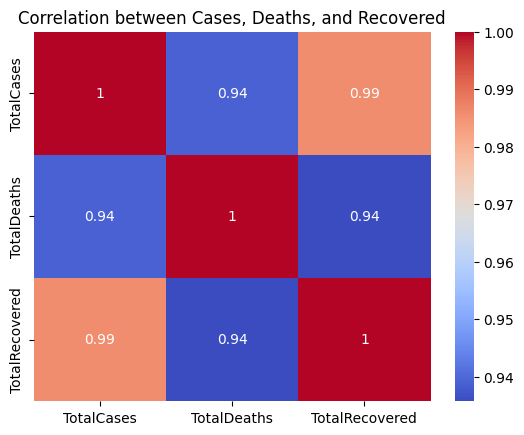

In [ ]:
# Compute pairwise correlation between TotalCases, TotalDeaths, and TotalRecovered and visualize as a heatmap
corr = data[['TotalCases','TotalDeaths','TotalRecovered']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Cases, Deaths, and Recovered")
plt.show()

In [ ]:
# Interactive Plotly scatter: Top 10 Countries colored by Country and sized by TotalCases — hover shows country name
top10 = data.sort_values("TotalCases", ascending=False).head(10)
fig = px.scatter(
    top10,
    x="TotalCases",
    y="TotalRecovered",
    size="TotalCases",
    hover_name="Country/Region",
    title="Top 10 Countries: Cases vs Recoveries",
    color="Country/Region"
)
fig.show()
